# Implementación Red LeNet5


        Introducción
<div style="text-align: justify;">
La presente tarea se enfoca en analizar la implementación de la red Le Net-5 por medio de la librería TensorFlow. La red convolucional Le Net-5 fue introducida en el documento “Gradient-Based Learning Applied to Document Recognition en el año de 1998 por Yann LeCunn, Leon Bottou, Yoshua Bengio y Patrick Haffner. La base de datos a utilizar es la base de datos MNIST, la cual fue obtenida de la librería de TensorFlow. Está librería está compuesta por un conjunto de entrenamiento de 60,000 y un conjunto de prueba de 10,000.
</div>

        Justificación
<div style="text-align: justify;">
La realización de esta tarea, brinda al estudiante una mejor comprensión sobre la arquitectura de la red convolucional Le Net-5. Las redes neuronales convolucionales (CNNs) es el tipo de redes más implementado en el área de Deep Learning para tareas enfocadas a imágenes debido al gran rendimiento que se obtiene en la detección de objetos, reconocimiento de patrones en imágenes, etc.
</div>

        Desarrollo 
<div style="text-align: justify;">
Antes de llevar acabo la implementación de la red convolucional Le Net-5 es necesario conocer los elementos que la componen. Por lo cual, a continuación, se muestra la siguiente figura, la cual fue obtenida del documento “ Gradient-Based Learning Applied to Document Recognition” , en donde se definen la arquitectura de la red convolucional Le Net-5.
</div>

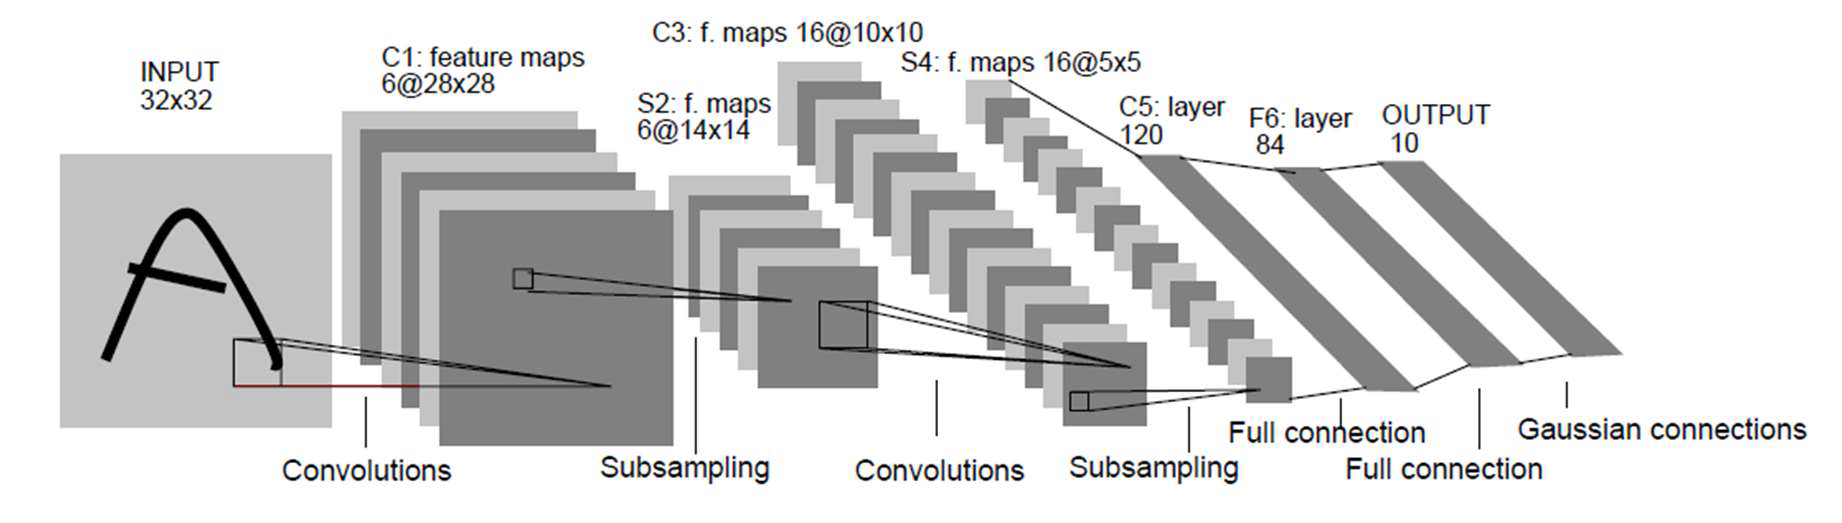

        Código

Declaración de librerias

In [115]:
## Librerias
import tensorflow as tf
import keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras import layers, models, losses

Importar la base de datos MNIST

In [116]:
(x_train,y_train),(x_test,y_test)= tf.keras.datasets.mnist.load_data()

In [117]:
print('x_train:',x_train.shape,'y_train:', y_train.shape)
print('x_test:',x_test.shape,'y_test:',y_test.shape)

x_train: (60000, 28, 28) y_train: (60000,)
x_test: (10000, 28, 28) y_test: (10000,)


La mayoría de las CNN aceptan tensores de 4 dimensiones ( tamaño de lote, alto, ancho y canal). Por lo cual, se añadira una dimensión ficticia, debidio a que las imágenes MNIST son en escala de grises.

In [118]:
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

<div style="text-align: justify;">
El modelo LeNet recibe imágenes de 32 por 32, por lo que se deberá modificar las imágenes de la base de datos MNIST. El relleno es una forma especial de enmascaramiento, donde los pasos son enmascarados al principio o al final de una secuencia. El relleno proviene de la necesidad de codificar datos de secuencias en lotes contiguos: para que todas las secuencias de un lote se ajusten a una longitud estándar determinada, es necesario rellenar o truncar algunas secuencias. Asi bien, los valores de píxeles se escalan entre 0 y 1.
</div>

In [119]:
x_train = np.pad(x_train, ((0,0),(2,2),(2,2),(0,0)))
x_test = np.pad(x_test, ((0,0),(2,2),(2,2),(0,0)))
print('x_train:',x_train.shape)
print('x_test:',x_test.shape)

x_train: (60000, 32, 32, 1)
x_test: (10000, 32, 32, 1)


Normalización 

In [120]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

print(x_train.shape)
print(x_test.shape)

(60000, 32, 32, 1)
(10000, 32, 32, 1)


Cambiando etiquetas a codificación "one hot"

In [121]:
print(y_train[0])
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
print(y_train[0])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


División del conjunto de entrenamiento, en un conjunto de validación y en un conjunto de
entrenamiento.

In [122]:
x_val = x_train[-12000:,:,:,:] 
y_val = y_train[-12000:] 
x_train = x_train[:-12000,:,:,:] 
y_train = y_train[:-12000]

In [123]:
print('x_val:',x_val.shape)
print('y_val:',y_val.shape)

print('x_train:',x_train.shape)
print('y_train:',y_train.shape)

print('x_test:',x_test.shape)
print('y_test:',y_test.shape)

x_val: (12000, 32, 32, 1)
y_val: (12000, 10)
x_train: (48000, 32, 32, 1)
y_train: (48000, 10)
x_test: (10000, 32, 32, 1)
y_test: (10000, 10)


Creación del Modelo

In [124]:
model = Sequential()
"""
Se añade la primera capa convolucional con 6 filtros, en donde cada uno es de 5x5, con una función de activación tanh. 
Así bien, se define el tamaño de cada imagen de entrada(32x32x1). 
"""
model.add(layers.Conv2D(6, 5, activation='tanh', input_shape=(32,32,1))) #C1:feature maps 6@28x28
"""
Adicionalmente se añade después de cada capa convolucional una capa de MaxPooling, la cual sirve para reducir el tamaño
de las imágenes realizando la correspondiente operación de agregación sobre los valores de una región continua.
"""
model.add(layers.MaxPooling2D())#S2:feature maps 6@14x14
"""
Posteriormente, se añade la segunda capa convolucional con 16 filtros, en donde cada uno es de 5x5, con una función de activación tanh.
"""
model.add(layers.Conv2D(16, 5, activation='sigmoid'))#C3:feature maps 16@10x10
model.add(layers.MaxPooling2D())#S4:feature maps 16@5x5
"""
Se utiliza Flatten, la cual aplana el volumen resultante después de la segunda capa convolucional, para después crear una serie de 
capas convolucionales fully connected: la primera con 120 neuronas y la segunda con 84 neuronas; para posteriormente conectarlo con la 
salida de tipo Softmax con 10 categorías.
"""
model.add(layers.Flatten())
model.add(layers.Dense(120,activation='tanh'))#C5:layer 120
model.add(layers.Dense(84, activation='tanh')) #F6:layer 84
model.add(layers.Dense(10, activation='softmax')) #OUTPUT

In [125]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 28, 28, 6)         156       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 14, 14, 6)        0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 5, 5, 16)         0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 400)               0         
                                                                 
 dense_15 (Dense)            (None, 120)              

In [126]:
#model.compile(optimizer='adam', loss=losses.sparse_categorical_crossentropy, metrics=['accuracy'])
model.compile(optimizer='adam', loss=keras.metrics.categorical_crossentropy, metrics=['accuracy'])

In [128]:
historial= model.fit(x_train, y_train,validation_data = (x_val, y_val), epochs=20, batch_size=256, verbose=1 )

Epoch 1/20
188/188 [==============================] - 30s 157ms/step - loss: 0.2468 - accuracy: 0.9273 - val_loss: 0.1536 - val_accuracy: 0.9564
Epoch 2/20
188/188 [==============================] - 29s 152ms/step - loss: 0.1430 - accuracy: 0.9566 - val_loss: 0.1061 - val_accuracy: 0.9687
Epoch 3/20
188/188 [==============================] - 26s 139ms/step - loss: 0.0998 - accuracy: 0.9697 - val_loss: 0.1071 - val_accuracy: 0.9679
Epoch 4/20
188/188 [==============================] - 24s 125ms/step - loss: 0.0828 - accuracy: 0.9743 - val_loss: 0.0727 - val_accuracy: 0.9788
Epoch 5/20
188/188 [==============================] - 24s 129ms/step - loss: 0.0709 - accuracy: 0.9780 - val_loss: 0.0707 - val_accuracy: 0.9790
Epoch 6/20
188/188 [==============================] - 24s 127ms/step - loss: 0.0610 - accuracy: 0.9810 - val_loss: 0.0676 - val_accuracy: 0.9797
Epoch 7/20
188/188 [==============================] - 24s 129ms/step - loss: 0.0541 - accuracy: 0.9835 - val_loss: 0.0653 - val_ac

Predicción del modelo

In [129]:
pred = model.predict(x_test)
print(pred)
print(pred.shape)
print(" ")
pred = np.argmax(pred,axis=1) #nos da el indice de un elemento de un vector máximo 
print(pred)
print(pred.shape)
label=np.argmax(y_test,axis=1)

[[2.2906246e-07 3.1613258e-06 3.2382302e-06 ... 9.9994111e-01
  7.9995573e-07 3.5679946e-05]
 [4.2611696e-06 2.0193955e-05 9.9996555e-01 ... 6.5238113e-09
  9.0218937e-06 6.4407391e-09]
 [8.8950566e-07 9.9999344e-01 1.0189333e-07 ... 2.3217813e-06
  1.4566449e-06 1.8852074e-08]
 ...
 [4.4315959e-10 3.7016378e-07 6.8151057e-10 ... 4.9147309e-07
  4.4450990e-06 1.9535312e-06]
 [4.2250605e-08 8.5463041e-09 1.2180212e-10 ... 2.2080320e-09
  7.3571318e-05 1.7875399e-08]
 [2.1575108e-06 5.3693880e-09 2.1011051e-07 ... 1.9443287e-10
  3.0288786e-06 1.7832188e-07]]
(10000, 10)
 
[7 2 1 ... 4 5 6]
(10000,)


Evaluación de la red entrenada

In [130]:
score = model.evaluate(x_test, y_test,verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.034457121044397354
Test accuracy: 0.9894999861717224


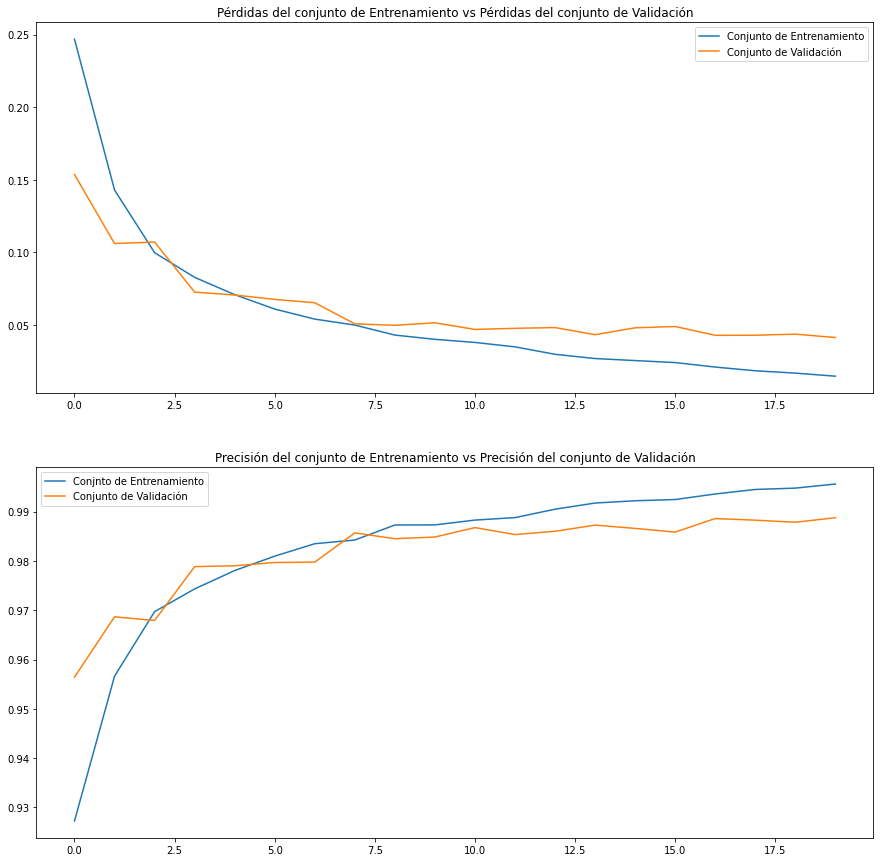

In [134]:
fig, axs = plt.subplots(2, 1, figsize=(15,15))  
axs[0].plot(historial.history['loss']) 
axs[0].plot(historial.history['val_loss']) 
axs[0].title.set_text('Pérdidas del conjunto de Entrenamiento vs Pérdidas del conjunto de Validación') 
axs[0].legend(['Conjunto de Entrenamiento', 'Conjunto de Validación'])  
axs[1].plot(historial.history['accuracy']) 
axs[1].plot(historial.history['val_accuracy']) 
axs[1].title.set_text('Precisión del conjunto de Entrenamiento vs Precisión del conjunto de Validación') 
axs[1].legend(['Conjnto de Entrenamiento', 'Conjunto de Validación'])

### Referencias Bibliográficas

[1] Gradient-Based Learning Applied to Document Recognition paper by Y. Lecun, L. Bottou, Y. Bengio and P. Haffner (1998)

[2] Alake, R.(2020) Understanding and Implementing LeNet-5 CNN Architecture(Deep Learning). Recuperado el día 4 de Marzo de 2022 de https://towardsdatascience.com/understanding-and-implementing-lenet-5-cnn-architecture-deep-learning-a2d531ebc342

[3] mrgrhn(2021)LeNet with TensorFlow. Recuperado el día 04 de Marzo de 2022 de https://medium.com/analytics-vidhya/lenet-with-tensorflow-a35da0d503df

[4] TensorFlow. Enmascaramiento y acolchado con Keras. Recuperado el día 04 de Marzo de 2022 de https://www.tensorflow.org/guide/keras/masking_and_padding